In [250]:
import pandas as pd
import ast
import numpy as np

In [251]:
path = 'consensus.csv'
df = pd.read_csv(path, index_col=0)[['premise', 'hypothesis', 'prompt', 'rationale']]

In [252]:
df['hypothesis'] = df['hypothesis'].apply(ast.literal_eval)

In [253]:
df.rationale = df.rationale.astype(str)
df['split'] = df.rationale.apply(lambda x: x.lower().split('most likely answer'))
df.split = df.split.apply(lambda x : x[1] if len(x) > 1 else x[0])

In [254]:
df.head(1)

,premise,hypothesis,prompt,rationale,split
0,Where would a captain be on the sea?,"[military, bridge of ship, battleship, basketb...",Questions: Where would a captain be on the sea...,1. The commonly agreed-upon answer to the ques...,1. the commonly agreed-upon answer to the ques...


In [255]:
# get correct index
df['correct_index'] = [{} for _ in range(len(df))]
for index, row in df.iterrows():
    for choice in row['hypothesis']:
        if choice in row['split']:
            row['correct_index'][choice] = row['split'].lower().index(choice.lower())

In [256]:
df['LLM_answer'] = df.correct_index.apply(lambda x: min(x, key=x.get) if len(x) > 0 else np.nan)

In [257]:
df[df.LLM_answer.isna()]

,premise,hypothesis,prompt,rationale,split,correct_index,LLM_answer


In [258]:
# read paper's answer
paper = pd.read_csv('paper.csv', index_col=0)

In [259]:
paper['premise'] = paper.input.str.split('\n').apply(lambda x: x[0])
paper.set_index('premise', inplace=True)
paper.index = paper.index.str.strip()

In [260]:
df.set_index('premise', inplace=True)

In [261]:
paper['my_label'] = df['LLM_answer']

In [262]:
sum(paper.label == paper.my_label) / len(paper)

0.7486910994764397

In [263]:
df.to_csv('consensus - full.csv')

In [271]:
TYPE = 'consensus'
temp = pd.read_csv(f'{TYPE} - full.csv')

import re
temp[~temp['rationale'].apply(lambda x: bool(re.match(r'\d+\.', x.strip())))]

,premise,hypothesis,prompt,rationale,split,correct_index,LLM_answer
9711,The rowdy frat boys shouted they would have fu...,"['do enjoy', 'get laid', 'enjoyable', 'work le...",NaN,Answer: (B) get laid. Justification: The phras...,answer: (b) get laid. justification: the phras...,{'get laid': 12},get laid
9712,When a man is watching tv and a nude women com...,"['sad', 'erections', 'entertainment', 'boredom...",NaN,Answer: (B) erections. Justification: The phys...,answer: (b) erections. justification: the phys...,{'erections': 12},erections
9713,From where would you expect to pick up a rock?,"['bridge', 'mountain range', 'mountains', 'gro...",NaN,Answer: (D) ground. Justification: Rocks are c...,answer: (d) ground. justification: rocks are c...,{'ground': 12},ground
9714,After the sex she had spent the night at his h...,"['love another', 'coffee', 'smoke', 'eat break...",NaN,Answer: (B) coffee. Justification: Making coff...,answer: (b) coffee. justification: making coff...,{'coffee': 12},coffee
9715,A bald eagle flew through the heavens above wh...,"['colorado', 'hells canyon', 'sky', 'south lak...",NaN,Answer: (B) Hells Canyon. Justification: Hells...,answer: (b) hells canyon. justification: hells...,{'hells canyon': 12},hells canyon
9716,"Instead of buying brand new pens, what part ca...","['ink in', 'ink cartridges', 'take notes', 'co...",NaN,Answer: (B) ink cartridges. Justification: The...,answer: (b) ink cartridges. justification: the...,{'ink cartridges': 12},ink cartridges
9717,The drum is a key part of which kind of musica...,"['vessel', 'rock band', 'marching band', 'musi...",NaN,Answer: (C) marching band. Justification: Whil...,answer: (c) marching band. justification: whil...,{'marching band': 12},marching band
9718,The steakhouse was conveniently located near t...,"['building', 'michigan', 'florida', 'maine', '...",NaN,Answer: (E) Utah. Justification: Based on gene...,answer: (e) utah. justification: based on gene...,{'utah': 12},utah
9719,Where is a person likely to dance to disco in ...,"['germany', 'town', 'rio de janeiro', 'dance d...",NaN,Answer: (A) Germany. Justification: Bavaria is...,answer: (a) germany. justification: bavaria is...,"{'germany': 12, 'town': 78}",germany
9720,The only place you'd find a marmoset in what g...,"['in wild', 'your moms house', 'burrow', 'amer...",NaN,Answer: (D) American West. Justification: The ...,answer: (d) american west. justification: the ...,{'american west': 12},american west


In [272]:
temp[~temp['rationale'].apply(lambda x: x.strip().endswith('.'))]
# pd.concat([a, b]).drop_duplicates().to_csv('error.csv')

,premise,hypothesis,prompt,rationale,split,correct_index,LLM_answer


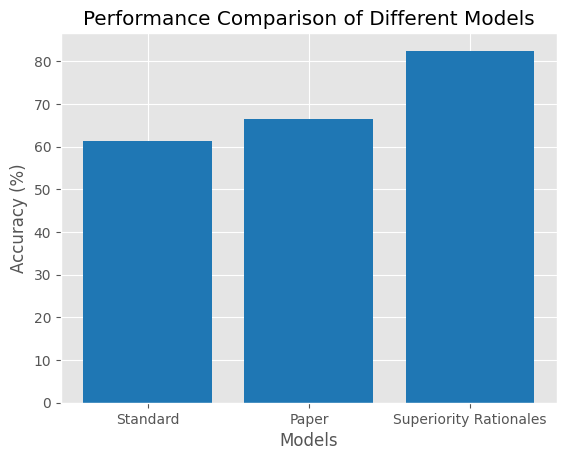

In [13]:
import matplotlib.pyplot as plt

# Define the data
models = ['Standard', 'Paper', 'Superiority Rationales']
accuracies = [61.41, 66.42, 82.52]

# Set the style
plt.style.use('ggplot')

# Create the bar chart
plt.bar(models, accuracies, color='#1f77b4')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Performance Comparison of Different Models')

# Show the plot
plt.show()
